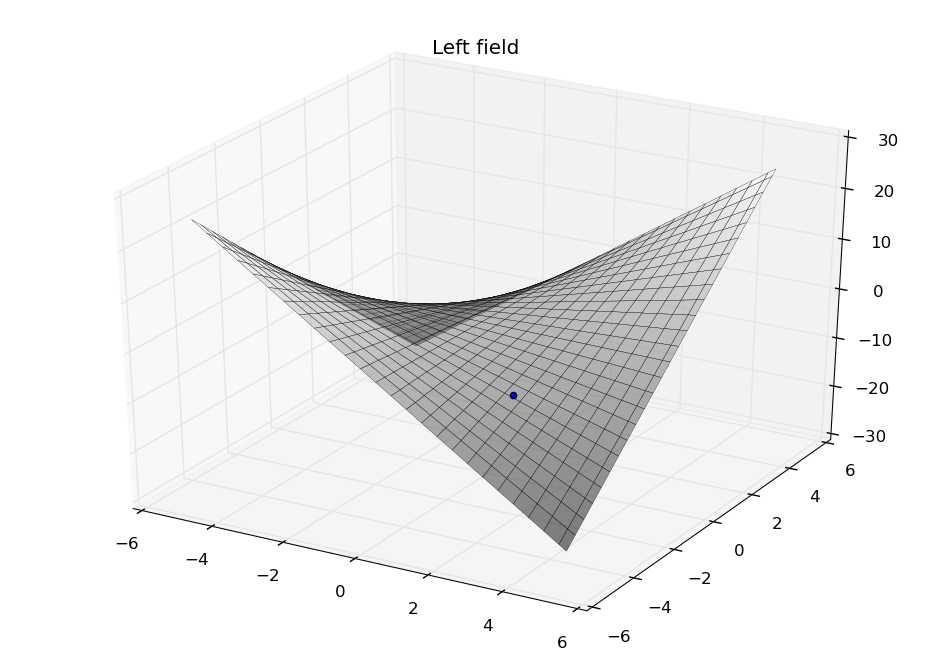

PyObject <mpl_toolkits.mplot3d.art3d.Patch3DCollection object at 0x7f704f720990>

In [20]:
using PyPlot
plt = PyPlot;

n = 50
xn = yn = n
x = linspace(-5, 5, xn)
y = linspace(-5, 5, yn)

xgrid = repmat(x, 1, xn)';
ygrid = repmat(y, 1, yn);

fgrid(x,y) = (x.*y)

fig = plt.figure("An example", figsize=(12,8));

ax = fig[:add_subplot](1,1,1, projection = "3d");
title("Left field")
z = fgrid(xgrid,ygrid)
ax[:plot_surface](xgrid, ygrid, z, rstride=2, cstride=2, cmap=ColorMap("gray"), alpha=0.5, linewidth=0.2)
plt.scatter(3, -4, label="scatter")


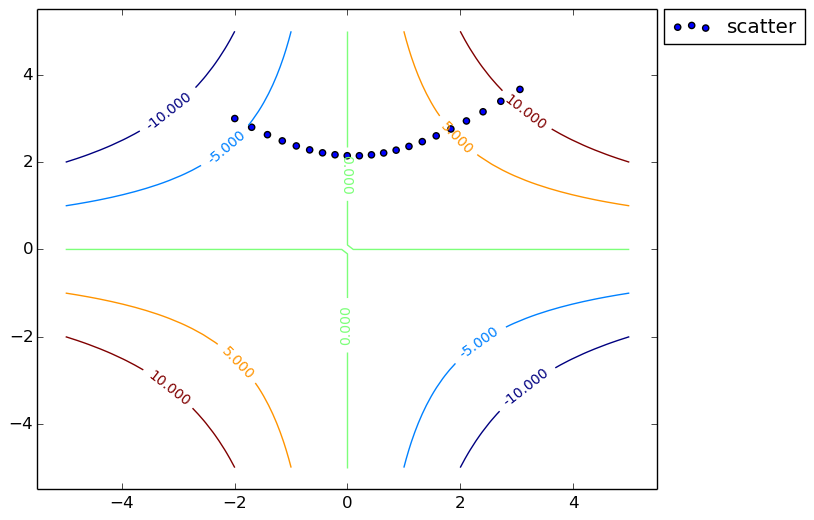

PyObject <matplotlib.legend.Legend object at 0x7f704ef7fcd0>

In [23]:
forwardCircuit(x, y) = (x * y)

plt.figure("Contour plot")

x = -2
y = 3

step_size = 0.1
h = 0.0001

plt.scatter(x, y, label="scatter")

for i = 1:20
    x_gradient = y
    y_gradient = x
    # x_gradient = (forwardCircuit(x+h,y) - forwardCircuit(x,y)) / h;
    # y_gradient = (forwardCircuit(x,y+h) - forwardCircuit(x,y)) / h;
    x += step_size * x_gradient
    y += step_size * y_gradient
    plt.scatter(x, y)
end

out_new = forwardCircuit(x, y)

#levels = [0.5, 1, 2]
CS = plt.contour(xgrid, ygrid, z, levels=[-10, -5, 0, 5, 10])
plt.clabel(CS, inline=1, fontsize=10)

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)


In [10]:
forwardMultiplyGate(x, y) = (x * y)
forwardAddGate(x, y) = (x + y)
forwardCircuit(x, y, z) = forwardMultiplyGate(forwardAddGate(x, y), z) 

x = -2
y = 5
z = -4

f = forwardCircuit(x, y, z) # output is -12
println(f)

# initial conditions
x = -2; y = 5; z = -4;
q = forwardAddGate(x, y); # q is 3
f = forwardMultiplyGate(q, z); # output is -12
println(f)

# gradient of the MULTIPLY gate with respect to its inputs
# wrt is short for "with respect to"
derivative_f_wrt_z = q; # 3
derivative_f_wrt_q = z; # -4

# derivative of the ADD gate with respect to its inputs
derivative_q_wrt_x = 1.0;
derivative_q_wrt_y = 1.0;

# chain rule
derivative_f_wrt_x = derivative_q_wrt_x * derivative_f_wrt_q; # -4
derivative_f_wrt_y = derivative_q_wrt_y * derivative_f_wrt_q; # -4

x = x + step_size * derivative_f_wrt_x; # -2.04
y = y + step_size * derivative_f_wrt_y; # 4.96
z = z + step_size * derivative_f_wrt_z; # -3.97

q = forwardAddGate(x, y); # q becomes 2.92
f = forwardMultiplyGate(q, z); # output is -11.59, up from -12! Nice!
println(f)


-12
-12


-11.5924
